<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 2 de IA de Omar Marca. Github: https://github.com/xeromark/TareasIA

Para realizar esta tarea se hizo uso de la librería scikit-learn cuya documentación está en [este enlace](https://scikit-learn.org/stable/): https://scikit-learn.org/stable/

El dataset utilizado contiene información sobre el estado de salud de personas quienes tienen o no enfermedades del corazón y se puede conseguir en [este enlace](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset): https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Pregunta 1

## Entrene el algoritmo de regresión logística sobre los datos seleccionados y aplique clasificación con algún (sub)conjunto DISJUNTO de prueba. Adicionalmente, utilice dos métricas (a su elección) de error, explicando cada una de ellas y luego comparándolas entre sí.

Para hacer el analisis, se ha decidido tomar la columna HighBP (High blood pressure) para el eje Y, que corresponde a si la persona tiene o no hipertensión. Por otra parte, para el eje X se ha tomado el apartado de BMI (Body mass index) que corresponde al indice de masa corporal. A continuación, se muestra el código utilizado para clasificar los datos asociados a personas con y sin enfermedades del corazón:

Luego se tiene el siguiente gráfico:


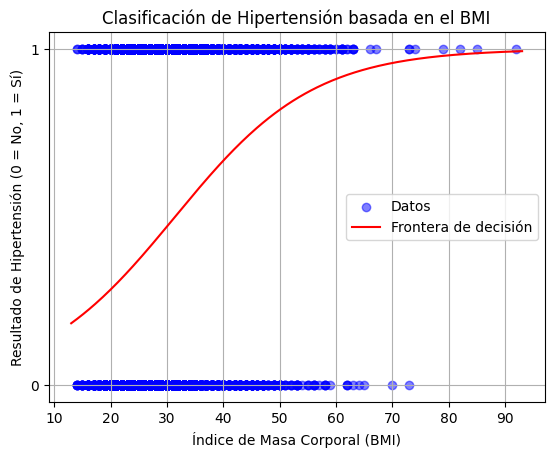

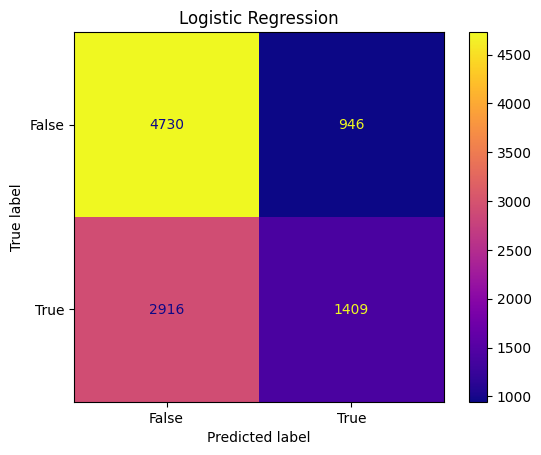

Donde:
TP (Verdaderos Positivos): 1409
FP (Falsos Positivos): 946
FN (Falsos Negativos): 2916
TN (Verdaderos Negativos): 4730 

A partir de esto, se obtienen las siguiente métricas:
Acuraccy: 0.61
Recall: 0.33



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv') # https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Seleccionar la característica del dataset de BMI y HighBP
x = df[['BMI']]    # Indice de masa corporal (BMI)
y = df['HighBP']  # si tiene o no Hipertensión (HighBP)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)
# el 50% de los datos se usan para pruebas y el resto para entrenar (parametro asociado a test_size)

model = LogisticRegression(max_iter=100000) # Crear el modelo de regresión logística
model.fit(X_train, y_train) # entrenar el modelo

# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

print("Luego se tiene el siguiente gráfico:")

# Graficar los datos
plt.scatter(x, y, color='blue', label='Datos', alpha=0.5)

# Graficar la frontera de decisión
# Crear un rango de valores de BMI
BMI_range = np.linspace(df['BMI'].min()-1, df['BMI'].max()+1, 300).reshape(-1, 1)

# Calcular z = b0 + b1 * BMI para cada valor en el rango
z = model.intercept_ + model.coef_ * BMI_range

# Aplicar la función logística G(z) = 1 / (1 + e^(-z))
G_z = 1 / (1 + np.exp(-z))

# Graficar la curva de regresión logística
plt.plot(BMI_range, G_z, color='red', label='Frontera de decisión')


# Configuración del gráfico
plt.title('Clasificación de Hipertensión basada en el BMI')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Resultado de Hipertensión (0 = No, 1 = Sí)')
plt.yticks([0, 1])
plt.legend()
plt.grid()
plt.show()


# Para mostrar el gráfico de la matriz de confusión
cm = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot(cmap='plasma')
plt.title('Logistic Regression')
plt.show()

print("Donde:")

# Se extraen TP, FP, FN y TN
TN, FP, FN, TP = cm.ravel()  # Desempaquetar los valores
print(f'TP (Verdaderos Positivos): {TP}')
print(f'FP (Falsos Positivos): {FP}')
print(f'FN (Falsos Negativos): {FN}')
print(f'TN (Verdaderos Negativos): {TN} \n')

print("A partir de esto, se obtienen las siguiente métricas:")


# Se calculan las métricas
accuracy = accuracy_score(y_test, predictions)
print(f'Acuraccy: {accuracy:.2f}')

recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.2f}\n')


### Analisis

**Acuraccy (Exactitud) se calcula como:**

(Accuracy) = (TP + TN) / (TP + TN + FP + FN)

Esta métrica indica el porcentaje de muestras que fueron clasificadas correctamente, ya sean positivas o negativas. Por lo tanto el resultado mostrado quiere decir que el modelo clasificó correctamente el 61% de las muestras.

**Recall (Exhaustividad) se calcula como:**

Recall  = TP / (TP + FN)

Esta métrica mide la capacidad del modelo para identificar correctamente solo los casos positivos. Por lo tanto el resultado mostrado quiere decir que el modelo clasificó correctamente el 28% de los casos positivos.


**La diferencia** entre ambas métricas radica en que mientras Acuraccy calcula el porcentaje de muestras totales clasificadas correctamente, Recall solo calcula la exactitud con la que el modelo predijo las verdaderas positivas.




### Conclusión

Como el algoritmo clasificó correctamente el 61% de las muestras, se puede decir que el modelo no es muy exacto, lo que significa que en un caso real podría utilizarse como una referencia para aquellas personas quienes tienen dudas respecto a si podrían entrar en un grupo de riesgo con problemas cardíacos pero no un determinante para un diagnostico definitivo.

No obstante, al observar el 33% del recall se puede decir con certeza que el modelo es poco preciso a la hora de diagnosticar los verdaderos positivos que son los que más importan a la hora de evaluar la salud de un paciente.


---

# Pregunta 2


## Entrene el algoritmo KNN (con al menos 5 valores distintos de K) sobre los datos seleccionados y aplique clasificación con el mismo (sub) conjunto DISJUNTO de prueba. Utilice nuevamente las dos métricas de la parte anterior, comparándolas entre sí y el punto anterior.

Para realizar las pruebas, se escogió para k los valores [1, 5, 7, 11, 21] para los mismos conjuntos seleccionados en la sección **(1)**. A continuación, se muestra el código de python con el cual se calculan las métricas:

A partir de esto, se obtienen las siguiente métricas para cada k:
accuracies = [0.569043095690431, 0.5923407659234077, 0.5882411758824118, 0.5673432656734326, 0.6069393060693931]
recalls = [0.1965034965034965, 0.368997668997669, 0.5356643356643357, 0.4888111888111888, 0.30116550116550117]

 Luego se obtiene el siguiente gráfico:



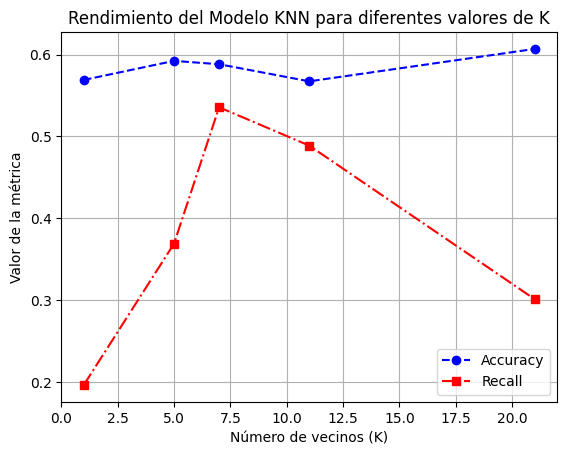


 Matriz de confusión de el resultado con mejor Recall 



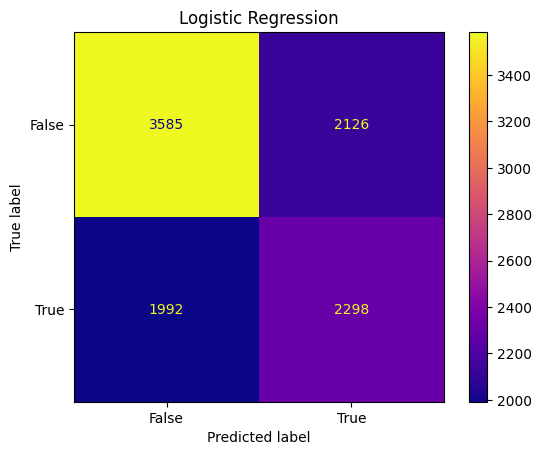


 Donde se tiene que:
TP (Verdaderos Positivos): 2298
FP (Falsos Positivos): 2126
FN (Falsos Negativos): 1992
TN (Verdaderos Negativos): 3585 



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

# Cargar el dataset
df = pd.read_csv('dataset.csv') # https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Dividir el dataset
X = df[["BMI"]]  # Solo usamos la característica BMI
y = df["HighBP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenar el modelo KNN
k_values = [1, 5, 7, 11, 21]
accuracies = []
recalls = []
cms = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    # Se extraen TP, FP, FN y TN
    cms.append(confusion_matrix(y_test, y_pred))

    # Calcular métricas
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Mostrar resultados
print("A partir de esto, se obtienen las siguiente métricas para cada k:")
print("accuracies =",accuracies)
print("recalls =",recalls)

print("\n Luego se obtiene el siguiente gráfico:\n")

# Graficar los resultados
plt.plot(k_values, accuracies, label='Accuracy', marker='o', color='b', linestyle='--')
plt.plot(k_values, recalls, label='Recall', marker='s', color='r', linestyle='-.')


plt.xlabel('Número de vecinos (K)')
plt.ylabel('Valor de la métrica')
plt.title('Rendimiento del Modelo KNN para diferentes valores de K')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("\n Matriz de confusión de el resultado con mejor Recall \n")

# Para mostrar el gráfico de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(cms[2], display_labels = [False, True])
cm_display.plot(cmap='plasma')
plt.title('Logistic Regression')
plt.show()

print("\n Donde se tiene que:")
# Se extraen TP, FP, FN y TN
TN, FP, FN, TP = cms[2].ravel()  # Desempaquetar los valores
print(f'TP (Verdaderos Positivos): {TP}')
print(f'FP (Falsos Positivos): {FP}')
print(f'FN (Falsos Negativos): {FN}')
print(f'TN (Verdaderos Negativos): {TN} \n')



### Analisis

Ya obtenidos los resultados, se tiene la siguiente tabla a modo de resumen:

<table>
  <tr>
    <th>k</th>
    <th>Accuracy ≈</th>
    <th>Recall ≈</th>


  </tr>
  <tr>
    <td>1</td>
    <td>0.569</td>
    <td>0.196</td>
  </tr>
   <tr>
    <td>5</td>
    <td>0.592</td>
    <td>0.368</td>
  </tr>
  <tr>
    <td>7</td>
    <td>0.588</td>
    <td>0.535</td>
  </tr>
  <tr>
    <td>11</td>
    <td>0.567</td>
    <td>0.488</td>
  </tr>
  <tr>
    <td>21</td>
    <td>0.606</td>
    <td>0.301</td>
  </tr>
  
</table>


Lo primero que hay que notar es que medida que aumenta el **k**, los valores para la métrica Accuracy aumentan ligeramente. Por otro lado, en el caso del Recall luego de aumentar **k** a 7, este disminuye más significativamente que el Accuracy.

Para hacer una mejor comparación con el punto anterior, se ha seleccionado la métrica que contiene un mejor Recall que en este caso corresponde cuando **k=7**. Para ello, se tiene la siguiente tabla:

<table>
  <tr>
    <th> Métrica </th>
    <th>Regresión logistica</th>
    <th>KNN</th>
    <th>Diferencia %</th>


  </tr>
  <tr>
    <td>Accuracy</td>
    <td> 0.61 </td>
    <td> 0.588 </td>
    <td> -3.7 % </td>

  </tr>
   <tr>
    <td>Recall</td>
    <td> 0.33 </td>
    <td> 0.535 </td>
    <td> 38.31 % </td>

  </tr>
  
</table>

### Conclusión

Si bien, el Accuracy no tuvo cambios significativos cuando se usó KNN (Solo varió en -3.7%), el Recall si tuvo cambios significativos pasando de un 33% a 38.31% al precedir correctamente los casos Verdaderos Positivos (TP).

Esto significa que para un **k=7**, este algoritmo es un poco más confiable a la hora de determinar los casos verdaderos positivos. No obstante, un 38.31% sigue siendo un valor muy bajo para detectar problemas del corazón por lo que no es recomendable usarlo para dar un diagnóstico definitivo pero si como una referencia aceptable al predecir correctamente la mitad de los casos Verdaderamente Positivos.



---

# Pregunta 3

## Entrene los algoritmos DBSCAN (con al menos 4 configuraciones distintas) y GMM (con una cantidad de grupos igual al número de etiquetas de la variable seleccionada en las preguntas 1) y 2)) sobre los datos. Comparar y analizar los resultados obtenidos.

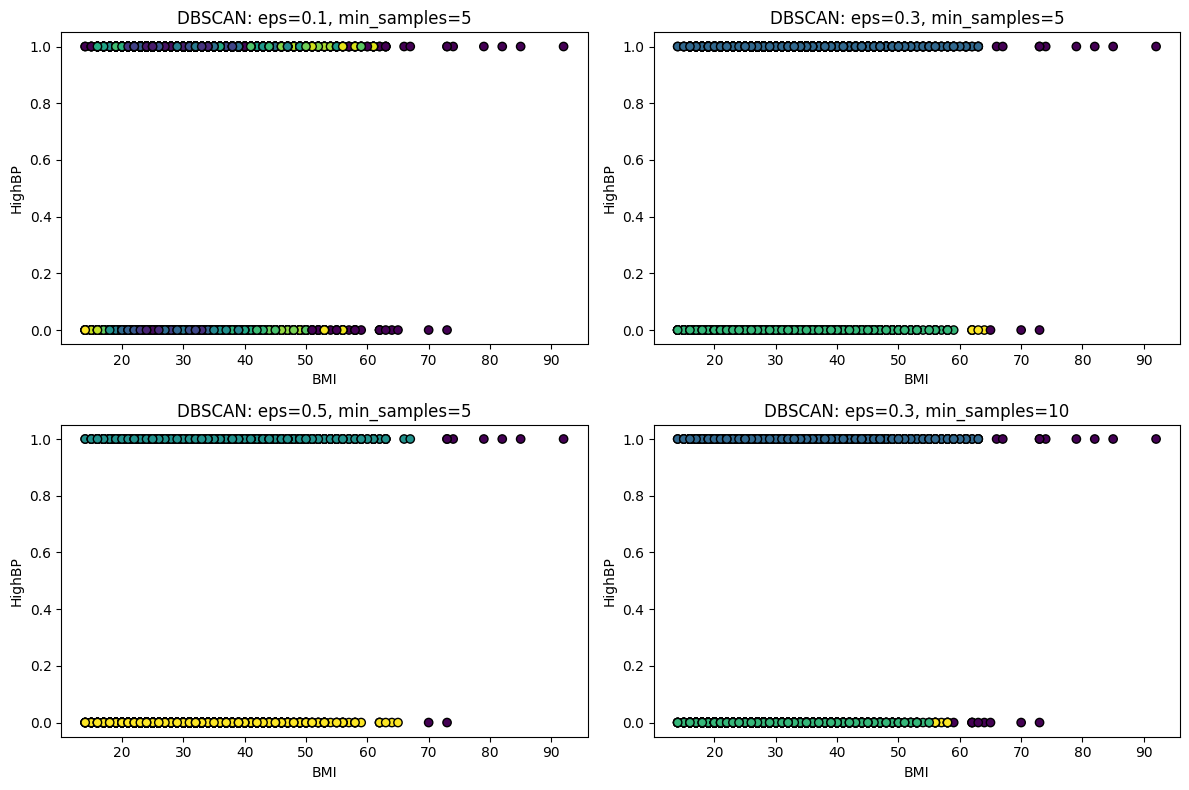

Configuración: eps=0.1, min_samples=5, Número de clusters: 83, Silhouette Score: 0.995
Configuración: eps=0.3, min_samples=5, Número de clusters: 3, Silhouette Score: 0.582
Configuración: eps=0.5, min_samples=5, Número de clusters: 2, Silhouette Score: 0.587
Configuración: eps=0.3, min_samples=10, Número de clusters: 3, Silhouette Score: 0.577


In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar el dataset
data = pd.read_csv('dataset.csv')

# Seleccionar las características
X = data[['BMI', 'HighBP']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configuraciones de DBSCAN
params = [
    (0.1, 5),   # Configuración 1
    (0.3, 5),   # Configuración 2
    (0.5, 5),   # Configuración 3
    (0.3, 10)   # Configuración 4
]

results = []

# Entrena el modelo DBSCAN con diferentes configuraciones
for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else -1
    results.append((eps, min_samples, clusters, silhouette))

# Para graficar los resultados
plt.figure(figsize=(12, 8))
for i, (eps, min_samples, clusters, _) in enumerate(results):
    plt.subplot(2, 2, i+1)
    plt.scatter(X['BMI'], X['HighBP'], c=clusters, cmap='viridis', marker='o', edgecolor='k')
    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
    plt.xlabel('BMI')
    plt.ylabel('HighBP')

plt.tight_layout()
plt.show()

# Mostrar numero de clusters
for eps, min_samples, clusters, silhouette in results:
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f'Configuración: eps={eps}, min_samples={min_samples}, '
          f'Número de clusters: {n_clusters}, Silhouette Score: {silhouette:.3f}')


Número de clusters: 2


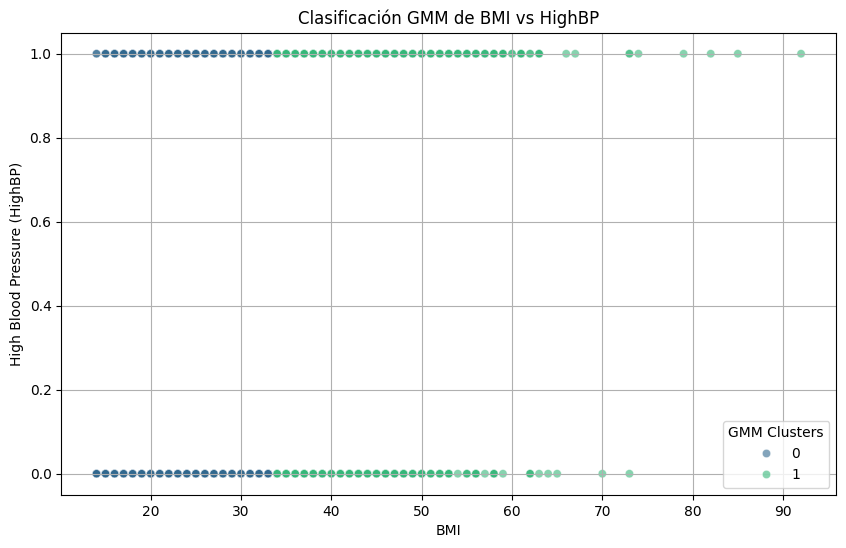

Silhouette Score: 0.6161751078348112
Medias de las gaussianas:
[[26.24686215]
 [35.07554694]]

Covarianzas de las gaussianas:
[[[15.62416407]]

 [[58.77966328]]]


In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 1. Cargar el dataset
df = pd.read_csv('dataset.csv')  # Reemplaza con la ruta a tu dataset

# 2. Seleccionar las columnas relevantes
x = df[['BMI']]
y = df['HighBP']

# 3. Entrenar el modelo GMM
gmm = GaussianMixture(n_components=2, random_state=42)  # Ajusta n_components si es necesario
gmm.fit(x)

# Predecir las etiquetas
predictions = gmm.predict(x)

# Añadir las predicciones al DataFrame
df['GMM_Predicted'] = predictions

# 4. Calcular el número de clusters
n_clusters = len(np.unique(predictions))
print(f'Número de clusters: {n_clusters}')

# 5. Visualizar los resultados
plt.figure(figsize=(10, 6))

sns.scatterplot(x='BMI', y='HighBP', data=df, hue='GMM_Predicted', palette='viridis', alpha=0.6)

plt.title('Clasificación GMM de BMI vs HighBP')
plt.xlabel('BMI')
plt.ylabel('High Blood Pressure (HighBP)')
plt.legend(title='GMM Clusters')
plt.grid()
plt.show()

# 6. Evaluación de Resultados
# Silhouette Score
silhouette_avg = silhouette_score(x, predictions)
print(f'Silhouette Score: {silhouette_avg}')


# Obtener los parámetros del modelo
means = gmm.means_  # Medias de las gaussianas
covariances = gmm.covariances_  # Covarianzas de las gaussianas

print("Medias de las gaussianas:")
print(means)

print("\nCovarianzas de las gaussianas:")
print(covariances)


## Análisis

Como DBSCAN y GMM son algoritmos no supervisados, se usarán otro tipo de métricas a diferencia de los puntos **(1)** y **(2)**. Para hacer la comparación, se usará Silhouette Score la cual es una métrica utilizada para evaluar la calidad de los clusters en un conjunto de datos y se basa en comparar la distancia entre los puntos dentro de un cluster y los puntos de otros clusters. La documentación asociada a ésta métrica se puede encontrar en [este enlace](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html). Entonces, se tienen los siguientes resultados para DBSCAN y GMM respectivamente:


  **DBSCAN:**

Para DBSCAN se obtienen los siguientes valores para las distintas configuraciones que se aplicaron:


<table>
  <tr>
    <th>Epsylon </th>
    <th>Puntos minimos </th>
    <th>Número de clusters </th>
    <th>Silhouette </th>

  </tr>
  <tr>
    <td>0.1</td>
    <td>5</td>
    <td>83</td>
    <td>0.995</td>
    
  </tr>
   <tr>
    <td>0.3</td>
    <td>5</td>
    <td>3</td>
    <td>0.582</td>

  </tr>
  <tr>
    <td>0.5</td>
    <td>5</td>
    <td>2</td>
    <td>0.587</td>

  </tr>
  <tr>
    <td>0.3</td>
    <td>10</td>
    <td>3</td>
    <td>0.577</td>

  </tr>

  
</table>


  **GMM:**

Para GMM se tiene que para una configuración de 2 clusters, se tiene que el valor de Silhouette es aproximadamente 0.61. Por otra parte, tambien se obtienen las medias gaussianas:



<table>
  <tr>
    <th>Cluster </th>
    <th>Medias de las gaussianas ≈</th>
    <th>Covarianzas de las gaussianas ≈</th>
  </tr>
  <tr>
    <td>0</td>
    <td>26.24</td>
    <td>15.62</td>
  </tr>
  <tr>
    <td>1</td>
    <td>35.07</td>
    <td>58.77</td>
  </tr>
</table>

Esta información nos dice lo siguiente:

**Cluster 0**: Si este cluster tiene una media de BMI aproximada de 26, esto podría indicar que este grupo tiene un peso saludable y no presenta enfermedades cardíacas. Por otra parte, dado a que la covarianza es de aproximadamente 15, esto significa que los individuos tienden a tener un BMI un poco más alto.

**Cluster 1**: Si este cluster tiene una media de BMI aproximada de 35, esto quiere decir que el grupo podría tener sobrepeso u obesidad y que puede presentar enfermedades cardíacas. Por otra parte, dado a que la covarianza es de aproximadamente 58, esto significa que los individuos tienden a tener un BMI más alto.

Tambien, hay que considerar que el Silhouette Score es del 61%, lo que significa que la separación de los clusters son decentes pero no ideales. Por lo tanto, esto se puede interpretar como que aquellos datos que estén más al centro del cluster tienen un mayor probabilidad de que estén mejor clasificados respecto a los que estan más cerca de las zonas limites entre dichos clusters.
